In [1]:
library(readxl)
library(dplyr)
library(purrr)
library(writexl)

# Define the path to the file
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"

# List all sheet names
sheets <- excel_sheets(file_path)
sheets



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "amygdalar-nuclei.lh.control"     "amygdalar-nuclei.lh.Quraan"     
 [3] "amygdalar-nuclei.rh.control"     "amygdalar-nuclei.rh.Quraan"     
 [5] "aparc_area_lh.control"           "aparc_area_lh.Quraan"           
 [7] "aparc_area_rh.control"           "aparc_area_rh.Quraan"           
 [9] "aparc_thickness_lh.control"      "aparc_thickness_lh.Quraan"      
[11] "aparc_thickness_rh.control"      "aparc_thickness_rh.Quraan"      
[13] "aparc_volume_lh.control.correct" "aparc_volume_lh.Quraan.correct" 
[15] "aparc_volume_rh.control.correct" "aparc_volume_rh.Quraan.correct" 
[17] "corrected-aseg_stats-control"    "corrected-aseg_stats-Quraan"    
[19] "brainstem.control"               "brainstem.Quraan"               
[21] "hipposubfields.lh.control"       "hipposubfields.lh.Quraan"       
[23] "hipposubfields.rh.control"       "hipposubfields.rh.Quraan"       
[25] "thalamic-nuclei.lh.control"      "thalamic-nuclei.lh.Quraan"      
[27] "thalamic-nuclei.rh.control"      "thalamic-nuclei.rh.Quraan"      
[29] "lh.a2009s.area.control"          "lh.a2009s.area.Quraan"          
[31] "rh.a2009s.area.control"          "rh.a2009s.area.Quraan"          
[33] "lh.a2009s.thickness.contol"      "lh.a2009s.thickness.Quraan"     
[35] "rh.a2009s.thickness.control"     "rh.a2009s.thickness.Quraan"

In [9]:
library(readxl)
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"

# Load raw data
df_control_raw <- read_excel(file_path, sheet = "amygdalar-nuclei.lh.control")
df_quraan_raw  <- read_excel(file_path, sheet = "amygdalar-nuclei.lh.Quraan")

# Show structure and first few rows
str(df_control_raw)
str(df_quraan_raw)

head(df_control_raw)


tibble [24 × 11] (S3: tbl_df/tbl/data.frame)
 $ Measure:volume                : chr [1:24] "Con012" "Con017" "Con018" "Con019" ...
 $ Lateral-nucleus_C             : num [1:24] 596 615 587 669 605 ...
 $ Basal-nucleus-C               : num [1:24] 431 387 426 479 435 ...
 $ Accessory-Basal-nucleus-C     : num [1:24] 281 224 273 276 279 ...
 $ Anterior-amygdaloid-area-AAA-C: num [1:24] 60 51.5 45.3 60.4 63.4 ...
 $ Central-nucleus-C             : num [1:24] 43.8 35 38.1 43.7 51.6 ...
 $ Medial-nucleus-C              : num [1:24] 22.5 20.8 24.9 16 21 ...
 $ Cortical-nucleus-C            : num [1:24] 28 21.4 27.1 21.9 28.5 ...
 $ Corticoamygdaloid-transitio-C : num [1:24] 178 152 196 189 176 ...
 $ Paralaminar-nucleus-C         : num [1:24] 41.2 42.8 47.4 53 44.7 ...
 $ Whole_amygdala-C              : num [1:24] 1683 1549 1664 1807 1704 ...
tibble [28 × 11] (S3: tbl_df/tbl/data.frame)
 $ Measure:volume                : chr [1:28] "Qur002" "Qur003" "Qur004" "Qur007" ...
 $ Lateral-nucleus-Q

Measure:volume,Lateral-nucleus_C,Basal-nucleus-C,Accessory-Basal-nucleus-C,Anterior-amygdaloid-area-AAA-C,Central-nucleus-C,Medial-nucleus-C,Cortical-nucleus-C,Corticoamygdaloid-transitio-C,Paralaminar-nucleus-C,Whole_amygdala-C
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Con012,596.4996,431.4970,281.3108,60.04871,43.81644,22.50271,27.95445,177.9200,41.16164,1682.711
Con017,615.3924,387.1761,223.5991,51.49076,35.00420,20.75817,21.38091,151.8387,42.78169,1549.422
Con018,587.0912,425.5430,272.7725,45.29351,38.05743,24.92881,27.13429,195.5774,47.38070,1663.779
Con019,669.2842,478.8350,275.5237,60.42551,43.74789,15.96843,21.94217,188.7024,52.95821,1807.387
Con021,604.6220,434.5550,278.9922,63.37254,51.61548,20.97747,28.45444,176.3508,44.71029,1703.650
Con022,660.5709,425.4273,229.2203,54.55901,38.69639,19.47507,19.13803,153.3263,50.52282,1650.936


[1] "✅ Shapiro-Wilk Normality Test Results:"
# A tibble: 20 × 3
   Region                       Group   p_value
   <chr>                        <chr>     <dbl>
 1 Accessory-Basal-nucleus      Control 0.357  
 2 Accessory-Basal-nucleus      Quraan  0.0169 
 3 Anterior-amygdaloid-area-AAA Control 0.603  
 4 Anterior-amygdaloid-area-AAA Quraan  0.0865 
 5 Basal-nucleus                Control 0.294  
 6 Basal-nucleus                Quraan  0.0277 
 7 Central-nucleus              Control 0.960  
 8 Central-nucleus              Quraan  0.360  
 9 Cortical-nucleus             Control 0.114  
10 Cortical-nucleus             Quraan  0.0716 
11 Corticoamygdaloid-transitio  Control 0.944  
12 Corticoamygdaloid-transitio  Quraan  0.0159 
13 Lateral-nucleus              Control 0.0376 
14 Lateral-nucleus              Quraan  0.171  
15 Medial-nucleus               Control 0.00691
16 Medial-nucleus               Quraan  0.0630 
17 Paralaminar-nucleus          Control 0.575  
18 Paralaminar-nucleus  

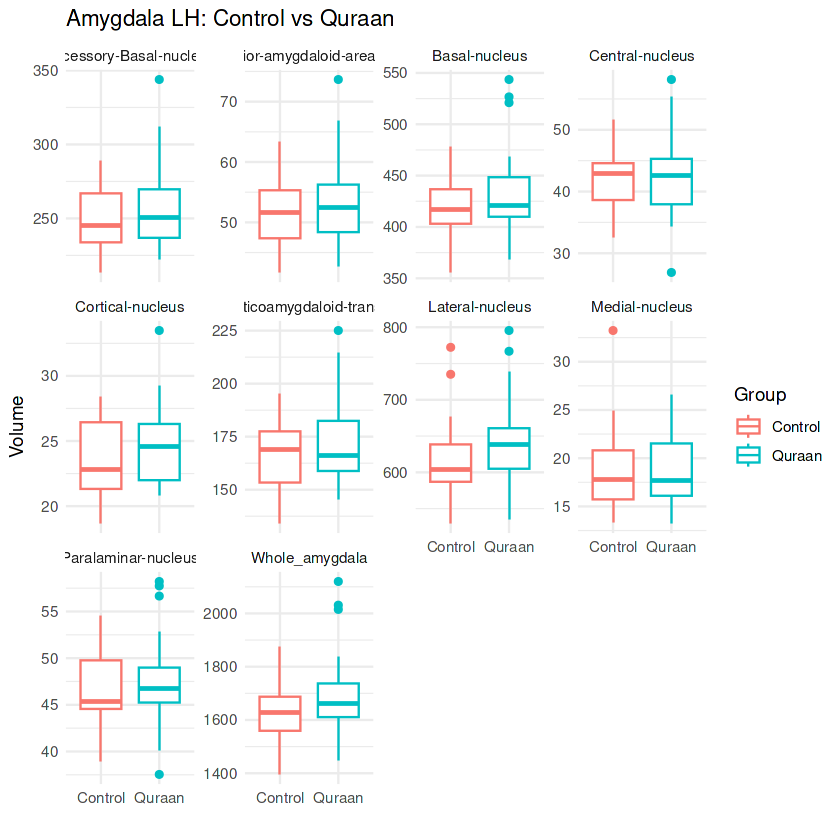

In [11]:
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)

file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"

# Load both sheets
df_control <- read_excel(file_path, sheet = "amygdalar-nuclei.lh.control")
df_quraan  <- read_excel(file_path, sheet = "amygdalar-nuclei.lh.Quraan")

# Remove ID column
id_col <- names(df_control)[1]
df_control <- df_control[-1]
df_quraan  <- df_quraan[-1]

# Clean column names to match
names(df_control) <- gsub("[-_]?C$", "", names(df_control))
names(df_quraan)  <- gsub("[-_]?Q$", "", names(df_quraan))

# Find common regions
common_regions <- intersect(names(df_control), names(df_quraan))

# Add Group label
df_control <- df_control %>% select(all_of(common_regions)) %>% mutate(Group = "Control")
df_quraan  <- df_quraan %>% select(all_of(common_regions)) %>% mutate(Group = "Quraan")

# Combine
df_combined <- bind_rows(df_control, df_quraan)

# Pivot to long format
df_long <- df_combined %>%
  pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

# === Shapiro-Wilk Normality Test ===
normality_results <- df_long %>%
  group_by(Region, Group) %>%
  summarise(
    p_value = tryCatch(shapiro.test(Value)$p.value, error = function(e) NA),
    .groups = "drop"
  )

print("✅ Shapiro-Wilk Normality Test Results:")
print(normality_results)

# === Descriptive Statistics ===
desc_stats <- df_long %>%
  group_by(Region, Group) %>%
  summarise(
    Mean = round(mean(Value, na.rm = TRUE), 2),
    SD = round(sd(Value, na.rm = TRUE), 2),
    N = n(),
    .groups = 'drop'
  )

print("✅ Descriptive Statistics:")
print(desc_stats)

# === Independent Samples T-Test ===
ttest_results <- df_long %>%
  group_by(Region) %>%
  summarise(
    p_value = tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA),
    .groups = 'drop'
  ) %>%
  mutate(Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"))

print("✅ Independent T-Test Results:")
print(ttest_results)

# === Final Summary Table ===
summary_table <- desc_stats %>%
  pivot_wider(names_from = Group, values_from = c(Mean, SD)) %>%
  left_join(ttest_results, by = "Region")

print("✅ Summary Table with Significance:")
print(summary_table)

# === Boxplots ===
ggboxplot(df_long, x = "Group", y = "Value", color = "Group",
          facet.by = "Region", scales = "free_y", nrow = 3) +
  theme_minimal() +
  labs(title = "Amygdala LH: Control vs Quraan", x = "", y = "Volume")


In [12]:
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)
library(writexl)

file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"
sheets <- excel_sheets(file_path)

# Match control vs Quraan sheets
sheet_pairs <- sheets[grepl("control", sheets)] %>%
  lapply(function(control_sheet) {
    base <- gsub("\\.control|\\.correct|\\.contol", "", control_sheet)
    q_sheet <- sheets[grepl(base, sheets) & grepl("Quraan", sheets)]
    if (length(q_sheet) > 0) {
      return(list(control = control_sheet, quraan = q_sheet[1], base = base))
    } else {
      return(NULL)
    }
  }) %>% purrr::compact()

# Master summary list
all_results <- list()

# Loop through each pair
for (pair in sheet_pairs) {
  cat("🔍 Processing:", pair$base, "\n")
  
  # Try reading both sheets
  df_c <- tryCatch(read_excel(file_path, sheet = pair$control), error = function(e) NULL)
  df_q <- tryCatch(read_excel(file_path, sheet = pair$quraan), error = function(e) NULL)
  
  if (is.null(df_c) || is.null(df_q)) next
  
  # Remove ID column
  df_c <- df_c[-1]
  df_q <- df_q[-1]

  # Clean column names
  names(df_c) <- gsub("[-_]?C$", "", names(df_c))
  names(df_q) <- gsub("[-_]?Q$", "", names(df_q))

  # Match columns
  common_cols <- intersect(names(df_c), names(df_q))
  if (length(common_cols) == 0) next

  df_c <- df_c %>% select(all_of(common_cols)) %>% mutate(Group = "Control")
  df_q <- df_q %>% select(all_of(common_cols)) %>% mutate(Group = "Quraan")
  df_combined <- bind_rows(df_c, df_q)
  df_long <- df_combined %>% pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

  # Shapiro Test
  shapiro <- df_long %>%
    group_by(Region, Group) %>%
    summarise(p_value = tryCatch(shapiro.test(Value)$p.value, error = function(e) NA), .groups = "drop")

  # Descriptive Stats
  desc_stats <- df_long %>%
    group_by(Region, Group) %>%
    summarise(
      Mean = round(mean(Value, na.rm = TRUE), 2),
      SD = round(sd(Value, na.rm = TRUE), 2),
      N = n(),
      .groups = 'drop'
    )

  # T-tests
  ttest_results <- df_long %>%
    group_by(Region) %>%
    summarise(
      p_value = tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA),
      .groups = 'drop'
    ) %>%
    mutate(Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"))

  # Combine
  summary_table <- desc_stats %>%
    pivot_wider(names_from = Group, values_from = c(Mean, SD)) %>%
    left_join(ttest_results, by = "Region") %>%
    mutate(Sheet = pair$base)

  all_results[[pair$base]] <- summary_table
}

# Final combined results
final_summary <- bind_rows(all_results)

# Save as Excel
write_xlsx(final_summary, "brain_region_group_comparison_summary.xlsx")

# View top results
print(head(final_summary, 10))


🔍 Processing: amygdalar-nuclei.lh 
🔍 Processing: amygdalar-nuclei.rh 
🔍 Processing: aparc_area_lh 
🔍 Processing: aparc_area_rh 
🔍 Processing: aparc_thickness_lh 
🔍 Processing: aparc_thickness_rh 
🔍 Processing: aparc_volume_lh 
🔍 Processing: aparc_volume_rh 
🔍 Processing: brainstem 
🔍 Processing: hipposubfields.lh 
🔍 Processing: hipposubfields.rh 
🔍 Processing: thalamic-nuclei.lh 
🔍 Processing: thalamic-nuclei.rh 
🔍 Processing: lh.a2009s.area 
🔍 Processing: rh.a2009s.area 
🔍 Processing: rh.a2009s.thickness 
# A tibble: 10 × 9
   Region                N Mean_Control Mean_Quraan SD_Control SD_Quraan p_value
   <chr>             <int>        <dbl>       <dbl>      <dbl>     <dbl>   <dbl>
 1 Accessory-Basal-…    24        250.         NA        21.9      NA      0.316
 2 Accessory-Basal-…    28         NA         257.       NA        28.5    0.316
 3 Anterior-amygdal…    24         51.9        NA         6.22     NA      0.397
 4 Anterior-amygdal…    28         NA          53.5      NA     

In [13]:
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)
library(writexl)

# File path
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"
sheets <- excel_sheets(file_path)

# Identify Control–Quraan sheet pairs
sheet_pairs <- sheets[grepl("control", sheets)] %>%
  lapply(function(control_sheet) {
    base <- gsub("\\.control|\\.correct|\\.contol", "", control_sheet)
    q_sheet <- sheets[grepl(base, sheets) & grepl("Quraan", sheets)]
    if (length(q_sheet) > 0) {
      return(list(control = control_sheet, quraan = q_sheet[1], base = base))
    } else {
      return(NULL)
    }
  }) %>% purrr::compact()

# Store all results
all_results <- list()

# Loop through each pair
for (pair in sheet_pairs) {
  cat("🔍 Processing:", pair$base, "\n")
  
  # Read sheets
  df_c <- tryCatch(read_excel(file_path, sheet = pair$control), error = function(e) NULL)
  df_q <- tryCatch(read_excel(file_path, sheet = pair$quraan), error = function(e) NULL)
  
  if (is.null(df_c) || is.null(df_q)) next
  
  # Remove ID column (1st column)
  df_c <- df_c[-1]
  df_q <- df_q[-1]

  # Standardize column names (remove _C or -Q)
  names(df_c) <- gsub("[-_]?C$", "", names(df_c))
  names(df_q) <- gsub("[-_]?Q$", "", names(df_q))

  # Match common columns
  common_cols <- intersect(names(df_c), names(df_q))
  if (length(common_cols) == 0) next

  # Add group labels
  df_c <- df_c %>% select(all_of(common_cols)) %>% mutate(Group = "Control")
  df_q <- df_q %>% select(all_of(common_cols)) %>% mutate(Group = "Quraan")

  # Combine and reshape
  df_combined <- bind_rows(df_c, df_q)
  df_long <- df_combined %>%
    pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

  # Shapiro-Wilk normality test
  shapiro <- df_long %>%
    group_by(Region, Group) %>%
    summarise(p_value = tryCatch(shapiro.test(Value)$p.value, error = function(e) NA), .groups = "drop")

  # Descriptive statistics
  desc_stats <- df_long %>%
    group_by(Region, Group) %>%
    summarise(
      Mean = round(mean(Value, na.rm = TRUE), 2),
      SD = round(sd(Value, na.rm = TRUE), 2),
      N = n(),
      .groups = 'drop'
    )

  # Pivot descriptive stats wide (side-by-side)
  desc_wide <- desc_stats %>%
    pivot_wider(
      names_from = Group,
      values_from = c(Mean, SD, N),
      names_glue = "{.value}_{Group}"
    )

  # Independent t-test
  ttest_results <- df_long %>%
    group_by(Region) %>%
    summarise(
      p_value = tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA),
      .groups = 'drop'
    ) %>%
    mutate(Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"))

  # Final summary table
  summary_table <- desc_wide %>%
    left_join(ttest_results, by = "Region") %>%
    mutate(Sheet = pair$base)

  all_results[[pair$base]] <- summary_table
}

# Combine all results
final_summary <- bind_rows(all_results)

# Save to Excel
write_xlsx(final_summary, "brain_region_group_comparison_summary.xlsx")

# View first 10 rows
print(head(final_summary, 10))


🔍 Processing: amygdalar-nuclei.lh 
🔍 Processing: amygdalar-nuclei.rh 
🔍 Processing: aparc_area_lh 
🔍 Processing: aparc_area_rh 
🔍 Processing: aparc_thickness_lh 
🔍 Processing: aparc_thickness_rh 
🔍 Processing: aparc_volume_lh 
🔍 Processing: aparc_volume_rh 
🔍 Processing: brainstem 
🔍 Processing: hipposubfields.lh 
🔍 Processing: hipposubfields.rh 
🔍 Processing: thalamic-nuclei.lh 
🔍 Processing: thalamic-nuclei.rh 
🔍 Processing: lh.a2009s.area 
🔍 Processing: rh.a2009s.area 
🔍 Processing: rh.a2009s.thickness 
# A tibble: 10 × 10
   Region       Mean_Control Mean_Quraan SD_Control SD_Quraan N_Control N_Quraan
   <chr>               <dbl>       <dbl>      <dbl>     <dbl>     <int>    <int>
 1 Accessory-B…        250.        257.       21.9      28.5         24       28
 2 Anterior-am…         51.9        53.5       6.22      6.97        24       28
 3 Basal-nucle…        421.        431.       32.9      45.0         24       28
 4 Central-nuc…         41.9        42.6       4.58      6.85  

In [14]:
# Example addition per region:
df_long <- df_long %>%
  group_by(Region) %>%
  mutate(z_score = scale(Value),
         Outlier = ifelse(abs(z_score) > 3, "Yes", "No"))


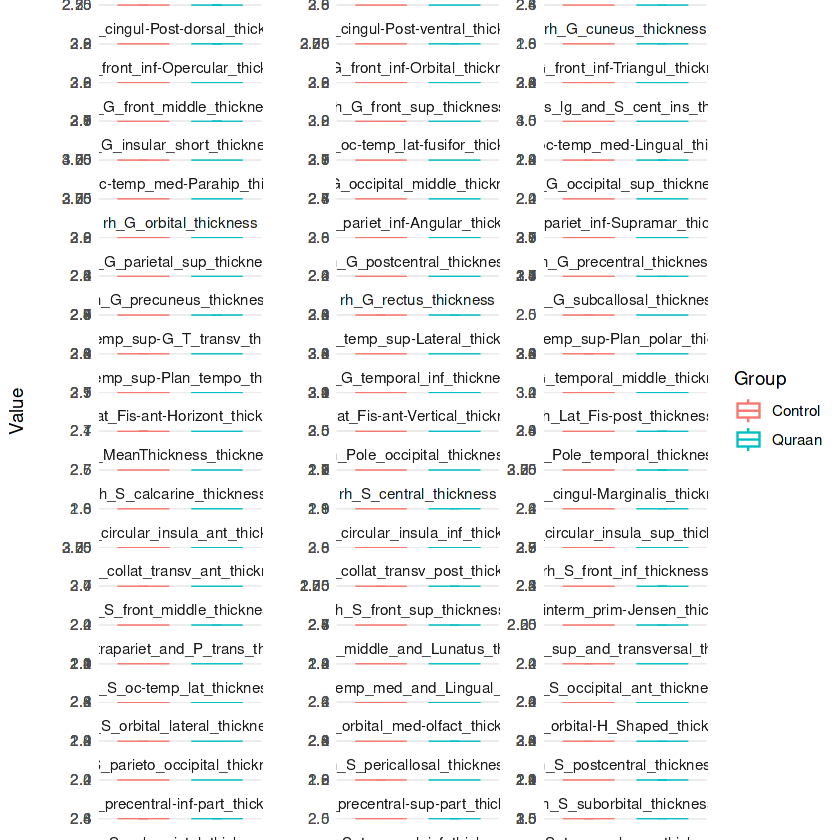

In [15]:
ggboxplot(df_long, x = "Group", y = "Value", color = "Group",
          facet.by = "Region", scales = "free_y", ncol = 3) +
  theme_minimal()


In [16]:
library(effsize)
d <- cohen.d(Value ~ Group, data = df_long)



Attaching package: ‘effsize’


The following object is masked from ‘package:psych’:

    cohen.d




In [19]:
# Load required libraries
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)
library(writexl)
library(effsize)

# File path
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"
sheets <- excel_sheets(file_path)

# Identify Control–Quraan sheet pairs
sheet_pairs <- sheets[grepl("control", sheets)] %>%
  lapply(function(control_sheet) {
    base <- gsub("\\.control|\\.correct|\\.contol", "", control_sheet)
    q_sheet <- sheets[grepl(base, sheets) & grepl("Quraan", sheets)]
    if (length(q_sheet) > 0) {
      return(list(control = control_sheet, quraan = q_sheet[1], base = base))
    } else {
      return(NULL)
    }
  }) %>% purrr::compact()

# Store all results
all_results <- list()

# Loop through each pair
for (pair in sheet_pairs) {
  cat("🔍 Processing:", pair$base, "\n")
  
  # Read both sheets
  df_c <- tryCatch(read_excel(file_path, sheet = pair$control), error = function(e) NULL)
  df_q <- tryCatch(read_excel(file_path, sheet = pair$quraan), error = function(e) NULL)
  
  if (is.null(df_c) || is.null(df_q)) next
  
  # Remove ID column (1st column)
  df_c <- df_c[-1]
  df_q <- df_q[-1]

  # Standardize column names (remove _C or -Q)
  names(df_c) <- gsub("[-_]?C$", "", names(df_c))
  names(df_q) <- gsub("[-_]?Q$", "", names(df_q))

  # Match common columns
  common_cols <- intersect(names(df_c), names(df_q))
  if (length(common_cols) == 0) next

  # Add group labels
  df_c <- df_c %>% select(all_of(common_cols)) %>% mutate(Group = "Control")
  df_q <- df_q %>% select(all_of(common_cols)) %>% mutate(Group = "Quraan")

  # Combine and reshape
  df_combined <- bind_rows(df_c, df_q)
  df_long <- df_combined %>%
    pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

  # Shapiro-Wilk normality test
  shapiro <- df_long %>%
    group_by(Region, Group) %>%
    summarise(p_value = tryCatch(shapiro.test(Value)$p.value, error = function(e) NA), .groups = "drop")

  # Descriptive statistics
  desc_stats <- df_long %>%
    group_by(Region, Group) %>%
    summarise(
      Mean = round(mean(Value, na.rm = TRUE), 2),
      SD = round(sd(Value, na.rm = TRUE), 2),
      N = n(),
      .groups = 'drop'
    )

  # Pivot descriptive stats wide (side-by-side)
  desc_wide <- desc_stats %>%
    pivot_wider(
      names_from = Group,
      values_from = c(Mean, SD, N),
      names_glue = "{.value}_{Group}"
    )

  # T-test + Cohen's d
  ttest_results <- df_long %>%
    group_by(Region) %>%
    summarise(
      p_value = tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA),
      d_value = tryCatch(as.numeric(effsize::cohen.d(Value ~ Group)$estimate), error = function(e) NA),
      .groups = 'drop'
    ) %>%
    mutate(Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"))

  # Final summary table
  summary_table <- desc_wide %>%
    left_join(ttest_results, by = "Region") %>%
    mutate(Sheet = pair$base)

  all_results[[pair$base]] <- summary_table
}

# Combine all sheet-level summaries
final_summary <- bind_rows(all_results)

# Save as Excel
write_xlsx(final_summary, "brain_region_group_comparison_summary.xlsx")

# View first few rows
print(head(final_summary, 10))


🔍 Processing: amygdalar-nuclei.lh 
🔍 Processing: amygdalar-nuclei.rh 
🔍 Processing: aparc_area_lh 
🔍 Processing: aparc_area_rh 
🔍 Processing: aparc_thickness_lh 
🔍 Processing: aparc_thickness_rh 
🔍 Processing: aparc_volume_lh 
🔍 Processing: aparc_volume_rh 
🔍 Processing: brainstem 
🔍 Processing: hipposubfields.lh 
🔍 Processing: hipposubfields.rh 
🔍 Processing: thalamic-nuclei.lh 
🔍 Processing: thalamic-nuclei.rh 
🔍 Processing: lh.a2009s.area 
🔍 Processing: rh.a2009s.area 
🔍 Processing: rh.a2009s.thickness 
# A tibble: 10 × 11
   Region       Mean_Control Mean_Quraan SD_Control SD_Quraan N_Control N_Quraan
   <chr>               <dbl>       <dbl>      <dbl>     <dbl>     <int>    <int>
 1 Accessory-B…        250.        257.       21.9      28.5         24       28
 2 Anterior-am…         51.9        53.5       6.22      6.97        24       28
 3 Basal-nucle…        421.        431.       32.9      45.0         24       28
 4 Central-nuc…         41.9        42.6       4.58      6.85  

In [20]:
# Load libraries
library(readxl)
library(dplyr)
library(tidyr)
library(effsize)

# File path
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"

# Define the exact sheet names
sheet_control <- "amygdalar-nuclei.rh.control"
sheet_quraan  <- "amygdalar-nuclei.rh.Quraan"

# Read the sheets
df_c <- read_excel(file_path, sheet = sheet_control)
df_q <- read_excel(file_path, sheet = sheet_quraan)

# Remove ID column
df_c <- df_c[-1]
df_q <- df_q[-1]

# Standardize column names
names(df_c) <- gsub("[-_]?C$", "", names(df_c))
names(df_q) <- gsub("[-_]?Q$", "", names(df_q))

# Match columns
common_cols <- intersect(names(df_c), names(df_q))
df_c <- df_c %>% select(all_of(common_cols)) %>% mutate(Group = "Control")
df_q <- df_q %>% select(all_of(common_cols)) %>% mutate(Group = "Quraan")

# Combine data
df_combined <- bind_rows(df_c, df_q)

# Reshape to long format
df_long <- df_combined %>%
  pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

# Descriptive statistics
desc_stats <- df_long %>%
  group_by(Region, Group) %>%
  summarise(
    Mean = round(mean(Value, na.rm = TRUE), 1),
    SD = round(sd(Value, na.rm = TRUE), 1),
    N = n(),
    .groups = "drop"
  )

# Reshape descriptive stats
desc_wide <- desc_stats %>%
  pivot_wider(names_from = Group, values_from = c(Mean, SD, N), names_glue = "{.value}_{Group}")

# T-test and Cohen's d
ttest_results <- df_long %>%
  group_by(Region) %>%
  summarise(
    p_value = round(tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA), 3),
    d_value = round(tryCatch(as.numeric(cohen.d(Value ~ Group)$estimate), error = function(e) NA), 2),
    Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"),
    .groups = "drop"
  )

# Merge all into final table
summary_rh <- desc_wide %>%
  left_join(ttest_results, by = "Region")

# View the final result
print(summary_rh)

# (Optional) Save the result
writexl::write_xlsx(summary_rh, "amygdala_rh_results.xlsx")


# A tibble: 10 × 10
   Region       Mean_Control Mean_Quraan SD_Control SD_Quraan N_Control N_Quraan
   <chr>               <dbl>       <dbl>      <dbl>     <dbl>     <int>    <int>
 1 Accessory-B…        264.        273.        19.4      27.3        24       28
 2 Anterior-am…         55.6        60.5        6         6.8        24       28
 3 Basal-nucle…        440.        456.        29.9      44.1        24       28
 4 Central-nuc…         44.1        45.1        4.8       6.1        24       28
 5 Cortical-nu…         25.4        26.8        2.6       2.5        24       28
 6 Corticoamyg…        176.        179.        12.9      18.5        24       28
 7 Lateral-nuc…        628.        665.        45.4      59.8        24       28
 8 Medial-nucl…         20.4        20.7        3.6       3.8        24       28
 9 Paralaminar…         48.3        49.1        3.1       4.9        24       28
10 Whole_amygd…       1703.       1776.       106.      155.         24       28
# ℹ 3 mo

In [21]:
# Load libraries
library(readxl)
library(dplyr)
library(tidyr)
library(effsize)

# File path
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"

# 🔁 Function to process any matched sheet pair (control vs Quraan)
analyze_brain_region <- function(base_name) {
  sheet_control <- paste0(base_name, ".control")
  sheet_quraan  <- paste0(base_name, ".Quraan")

  # Try reading both sheets
  df_c <- tryCatch(read_excel(file_path, sheet = sheet_control), error = function(e) NULL)
  df_q <- tryCatch(read_excel(file_path, sheet = sheet_quraan), error = function(e) NULL)

  if (is.null(df_c) || is.null(df_q)) {
    cat("❌ Could not read one or both sheets for:", base_name, "\n")
    return(NULL)
  }

  # Remove ID column
  df_c <- df_c[-1]
  df_q <- df_q[-1]

  # Standardize column names
  names(df_c) <- gsub("[-_]?C$", "", names(df_c))
  names(df_q) <- gsub("[-_]?Q$", "", names(df_q))

  # Match common columns
  common_cols <- intersect(names(df_c), names(df_q))
  df_c <- df_c %>% select(all_of(common_cols)) %>% mutate(Group = "Control")
  df_q <- df_q %>% select(all_of(common_cols)) %>% mutate(Group = "Quraan")

  # Combine and reshape
  df_combined <- bind_rows(df_c, df_q)
  df_long <- df_combined %>%
    pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

  # Descriptive statistics
  desc_stats <- df_long %>%
    group_by(Region, Group) %>%
    summarise(
      Mean = round(mean(Value, na.rm = TRUE), 1),
      SD = round(sd(Value, na.rm = TRUE), 1),
      N = n(),
      .groups = "drop"
    )

  # Reshape descriptives wide
  desc_wide <- desc_stats %>%
    pivot_wider(names_from = Group, values_from = c(Mean, SD, N), names_glue = "{.value}_{Group}")

  # T-tests and Cohen’s d
  ttest_results <- df_long %>%
    group_by(Region) %>%
    summarise(
      p_value = round(tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA), 3),
      d_value = round(tryCatch(as.numeric(cohen.d(Value ~ Group)$estimate), error = function(e) NA), 2),
      Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"),
      .groups = "drop"
    )

  # Final summary
  summary <- desc_wide %>%
    left_join(ttest_results, by = "Region") %>%
    mutate(Sheet = base_name)

  return(summary)
}

# ✅ Run analysis for each region of interest
hippo_lh <- analyze_brain_region("hipposubfields.lh")
hippo_rh <- analyze_brain_region("hipposubfields.rh")
thal_lh  <- analyze_brain_region("thalamic-nuclei.lh")
thal_rh  <- analyze_brain_region("thalamic-nuclei.rh")

# ✅ Combine and inspect
all_summary <- bind_rows(hippo_lh, hippo_rh, thal_lh, thal_rh)
print(head(all_summary))

# (Optional) Save to file
writexl::write_xlsx(all_summary, "hippo_thalamus_summary.xlsx")


# A tibble: 6 × 11
  Region   Mean_Control Mean_Quraan SD_Control SD_Quraan N_Control N_Quraan
  <chr>           <dbl>       <dbl>      <dbl>     <dbl>     <int>    <int>
1 CA1-body        128         132         12.8      19.4        24       28
2 CA1-head        514.        528.        48.8      65.9        24       28
3 CA3-body         86.4        92.8        9.3      17.2        24       28
4 CA3-head        123.        122.        10.3      15          24       28
5 CA4-body        119.        123          9.1      11.4        24       28
6 CA4-head        129.        131.         9.1      15.4        24       28
# ℹ 4 more variables: p_value <dbl>, d_value <dbl>, Significant <chr>,
#   Sheet <chr>


In [23]:
# Load required libraries
library(readxl)
library(dplyr)
library(tidyr)
library(effsize)

# Set file path
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"

# Define a reusable analysis function
analyze_brain_region <- function(base_name) {
  sheet_control <- paste0(base_name, ".control")
  sheet_quraan  <- paste0(base_name, ".Quraan")

  # Try reading both sheets
  df_c <- tryCatch(read_excel(file_path, sheet = sheet_control), error = function(e) NULL)
  df_q <- tryCatch(read_excel(file_path, sheet = sheet_quraan), error = function(e) NULL)

  if (is.null(df_c) || is.null(df_q)) {
    cat("❌ Could not read one or both sheets for:", base_name, "\n")
    return(NULL)
  }

  # Drop ID column
  df_c <- df_c[-1]
  df_q <- df_q[-1]

  # Clean column names
  names(df_c) <- gsub("[-_]?C$", "", names(df_c))
  names(df_q) <- gsub("[-_]?Q$", "", names(df_q))

  # Merge matched columns
  common_cols <- intersect(names(df_c), names(df_q))
  df_c <- df_c %>% select(all_of(common_cols)) %>% mutate(Group = "Control")
  df_q <- df_q %>% select(all_of(common_cols)) %>% mutate(Group = "Quraan")

  # Combine and reshape
  df_combined <- bind_rows(df_c, df_q)
  df_long <- df_combined %>%
    pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

  # Descriptive stats
  desc_stats <- df_long %>%
    group_by(Region, Group) %>%
    summarise(
      Mean = round(mean(Value, na.rm = TRUE), 1),
      SD = round(sd(Value, na.rm = TRUE), 1),
      N = n(),
      .groups = "drop"
    )

  # Pivot wide
  desc_wide <- desc_stats %>%
    pivot_wider(names_from = Group, values_from = c(Mean, SD, N), names_glue = "{.value}_{Group}")

  # Inferential stats
  ttest_results <- df_long %>%
    group_by(Region) %>%
    summarise(
      p_value = round(tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA), 3),
      d_value = round(tryCatch(as.numeric(cohen.d(Value ~ Group)$estimate), error = function(e) NA), 2),
      Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"),
      .groups = "drop"
    )

  # Merge results
  summary <- desc_wide %>%
    left_join(ttest_results, by = "Region") %>%
    mutate(Sheet = base_name)

  return(summary)
}

#  Run analysis for hippocampus RH and thalamic nuclei LH & RH
hippo_rh   <- analyze_brain_region("hipposubfields.rh")
thal_lh    <- analyze_brain_region("thalamic-nuclei.lh")
thal_rh    <- analyze_brain_region("thalamic-nuclei.rh")

# Combine all outputs
combined_summary <- bind_rows(hippo_rh, thal_lh, thal_rh)

#  Preview
print(head(combined_summary, 10))

# Optional: Save to file
writexl::write_xlsx(combined_summary, "hippo_thalamus_combined_summary.xlsx")


# A tibble: 10 × 11
   Region       Mean_Control Mean_Quraan SD_Control SD_Quraan N_Control N_Quraan
   <chr>               <dbl>       <dbl>      <dbl>     <dbl>     <int>    <int>
 1 CA1-body            134         143.        16.9      19.6        24       28
 2 CA1-head            545.        556         58.7      63.2        24       28
 3 CA3-body             93.9        98.3       14.1      15.1        24       28
 4 CA3-head            128.        128.        13.5      14.1        24       28
 5 CA4-body            121.        123.        11.5      11.9        24       28
 6 CA4-head            133.        135.        12.7      14.6        24       28
 7 GC-ML-DG-bo…        136.        138.        11.6      12.1        24       28
 8 GC-ML-DG-he…        160         161.        17.1      18.1        24       28
 9 HATA                 63.9        63.7        6.1       8.9        24       28
10 Hippocampal…        578.        594.        58.5      65.5        24       28
# ℹ 4 mo

In [24]:
# Load libraries
library(readxl)
library(dplyr)
library(tidyr)
library(effsize)

# Set file path
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"

# Function for analysis
analyze_brain_region <- function(base_name) {
  sheet_control <- paste0(base_name, ".control")
  sheet_quraan  <- paste0(base_name, ".Quraan")

  # Read Excel sheets
  df_c <- tryCatch(read_excel(file_path, sheet = sheet_control), error = function(e) NULL)
  df_q <- tryCatch(read_excel(file_path, sheet = sheet_quraan), error = function(e) NULL)

  if (is.null(df_c) || is.null(df_q)) {
    cat("❌ Could not read one or both sheets for:", base_name, "\n")
    return(NULL)
  }

  # Remove first (ID) column
  df_c <- df_c[-1]
  df_q <- df_q[-1]

  # Standardize column names
  names(df_c) <- gsub("[-_]?C$", "", names(df_c))
  names(df_q) <- gsub("[-_]?Q$", "", names(df_q))

  # Match common columns and label groups
  common_cols <- intersect(names(df_c), names(df_q))
  df_c <- df_c %>% select(all_of(common_cols)) %>% mutate(Group = "Control")
  df_q <- df_q %>% select(all_of(common_cols)) %>% mutate(Group = "Quraan")

  # Combine datasets
  df_combined <- bind_rows(df_c, df_q)

  # Reshape to long format
  df_long <- df_combined %>%
    pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

  # Descriptive statistics
  desc_stats <- df_long %>%
    group_by(Region, Group) %>%
    summarise(
      Mean = round(mean(Value, na.rm = TRUE), 1),
      SD = round(sd(Value, na.rm = TRUE), 1),
      N = n(),
      .groups = "drop"
    )

  # Reshape wide
  desc_wide <- desc_stats %>%
    pivot_wider(names_from = Group, values_from = c(Mean, SD, N), names_glue = "{.value}_{Group}")

  # T-tests and Cohen’s d
  ttest_results <- df_long %>%
    group_by(Region) %>%
    summarise(
      p_value = round(tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA), 3),
      d_value = round(tryCatch(as.numeric(cohen.d(Value ~ Group)$estimate), error = function(e) NA), 2),
      Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"),
      .groups = "drop"
    )

  # Merge results
  summary <- desc_wide %>%
    left_join(ttest_results, by = "Region") %>%
    mutate(Sheet = base_name)

  return(summary)
}

# Run for thalamic regions
thal_lh <- analyze_brain_region("thalamic-nuclei.lh")
thal_rh <- analyze_brain_region("thalamic-nuclei.rh")

# Combine and preview
thalamus_summary <- bind_rows(thal_lh, thal_rh)
print(head(thalamus_summary, 10))

# Optional: Save to file
writexl::write_xlsx(thalamus_summary, "thalamic_nuclei_summary.xlsx")


# A tibble: 10 × 11
   Region Mean_Control Mean_Quraan SD_Control SD_Quraan N_Control N_Quraan
   <chr>         <dbl>       <dbl>      <dbl>     <dbl>     <int>    <int>
 1 AV            129.        128.        19.5      14.3        24       28
 2 CL             34.3        34.1        8.9       5          24       28
 3 CM            243.        245.        24.3      22.5        24       28
 4 CeM            70.5        69.1        7.4       6          24       28
 5 L-Sg           26.6        25.1        5.7       4.9        24       28
 6 LD             30.5        27.5       11.1       7.2        24       28
 7 LGN           277.        280.        30.5      33.7        24       28
 8 LP            129.        131.        17.2      14.7        24       28
 9 MDl           293.        292.        25.1      28.2        24       28
10 MDm           858.        854.        77.1      72.9        24       28
# ℹ 4 more variables: p_value <dbl>, d_value <dbl>, Significant <chr>,
#   Sheet

In [25]:
# 📦 Load required libraries
library(readxl)
library(dplyr)
library(tidyr)
library(effsize)
library(writexl)

# 📁 Set file path
file_path <- "/kaggle/input/cactus-30293101/combined.xlsx"

# 🔁 Define reusable function for brain region analysis
analyze_brain_region <- function(base_name) {
  sheet_control <- paste0(base_name, ".control")
  sheet_quraan  <- paste0(base_name, ".Quraan")

  # Try to read both sheets
  df_c <- tryCatch(read_excel(file_path, sheet = sheet_control), error = function(e) NULL)
  df_q <- tryCatch(read_excel(file_path, sheet = sheet_quraan), error = function(e) NULL)

  if (is.null(df_c) || is.null(df_q)) {
    cat("❌ Could not read one or both sheets for:", base_name, "\n")
    return(NULL)
  }

  # Drop ID column
  df_c <- df_c[-1]
  df_q <- df_q[-1]

  # Clean column names
  names(df_c) <- gsub("[-_]?C$", "", names(df_c))
  names(df_q) <- gsub("[-_]?Q$", "", names(df_q))

  # Match columns
  common_cols <- intersect(names(df_c), names(df_q))
  df_c <- df_c %>% select(all_of(common_cols)) %>% mutate(Group = "Control")
  df_q <- df_q %>% select(all_of(common_cols)) %>% mutate(Group = "Quraan")

  # Combine datasets
  df_combined <- bind_rows(df_c, df_q)

  # Reshape to long format
  df_long <- df_combined %>%
    pivot_longer(cols = -Group, names_to = "Region", values_to = "Value")

  # Descriptive statistics
  desc_stats <- df_long %>%
    group_by(Region, Group) %>%
    summarise(
      Mean = round(mean(Value, na.rm = TRUE), 1),
      SD = round(sd(Value, na.rm = TRUE), 1),
      N = n(),
      .groups = "drop"
    )

  # Reshape to wide format
  desc_wide <- desc_stats %>%
    pivot_wider(names_from = Group, values_from = c(Mean, SD, N), names_glue = "{.value}_{Group}")

  # Inferential statistics (t-test + Cohen's d)
  ttest_results <- df_long %>%
    group_by(Region) %>%
    summarise(
      p_value = round(tryCatch(t.test(Value ~ Group)$p.value, error = function(e) NA), 3),
      d_value = round(tryCatch(as.numeric(cohen.d(Value ~ Group)$estimate), error = function(e) NA), 2),
      Significant = ifelse(!is.na(p_value) & p_value < 0.05, "Yes", "No"),
      .groups = "drop"
    )

  # Final summary table
  summary <- desc_wide %>%
    left_join(ttest_results, by = "Region") %>%
    mutate(Sheet = base_name)

  return(summary)
}

# 🧠 Analyze the right thalamic nuclei
thal_rh <- analyze_brain_region("thalamic-nuclei.rh")

# 🖨️ Print results
print(thal_rh)

# 💾 Optional: Save to Excel
write_xlsx(thal_rh, "thalamic_nuclei_rh_summary.xlsx")


# A tibble: 26 × 11
   Region Mean_Control Mean_Quraan SD_Control SD_Quraan N_Control N_Quraan
   <chr>         <dbl>       <dbl>      <dbl>     <dbl>     <int>    <int>
 1 AV            139.        138.        20.2      18.5        24       28
 2 CL             34.2        33.6        6.7       5.5        24       28
 3 CM            246         253.        26        20.7        24       28
 4 CeM            74.8        73.6        8.2       6          24       28
 5 L-Sg           22          24.4        3.3       5.1        24       28
 6 LD             29.2        28          8.6       9.4        24       28
 7 LGN           271         276.        22.3      31.1        24       28
 8 LP            124         125.        15.7      15.9        24       28
 9 MDl           311         309.        29.3      28.9        24       28
10 MDm           873.        863.        73.8      73.6        24       28
# ℹ 16 more rows
# ℹ 4 more variables: p_value <dbl>, d_value <dbl>, Significant